In [123]:
#importing all the required libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [94]:
#importing data from dataset to dataframe
loan_data=pd.read_csv("./loan/loan.csv")
#checking the shape of the dataframe
loan_data.shape
#Observation: The dataset has 39717 rows and 111 cloumns

(39717, 111)

In [95]:
#printing the first 5 rows of data
display(loan_data.head(3))

#checking the datatype of the data
print(loan_data.info())
print(loan_data.dtypes)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Data cleaning 

In [96]:
#Checking the number of null values in the rows
print(loan_data.isnull().all(axis=1).sum())
#Observation:There are no empty rows in the whole dataset

0


In [97]:
#Checking the number of null values in the columns
print(loan_data.isnull().all(axis=0).sum())
#Observation: There are 54 columns with null values
#printing all the columns with null values
print(loan_data.isnull().sum())


54
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [98]:
#Visualising missing values with the help of bargraph
#Below we are plotting count of values per columns ignoring missing values for the loan datset

<AxesSubplot:>

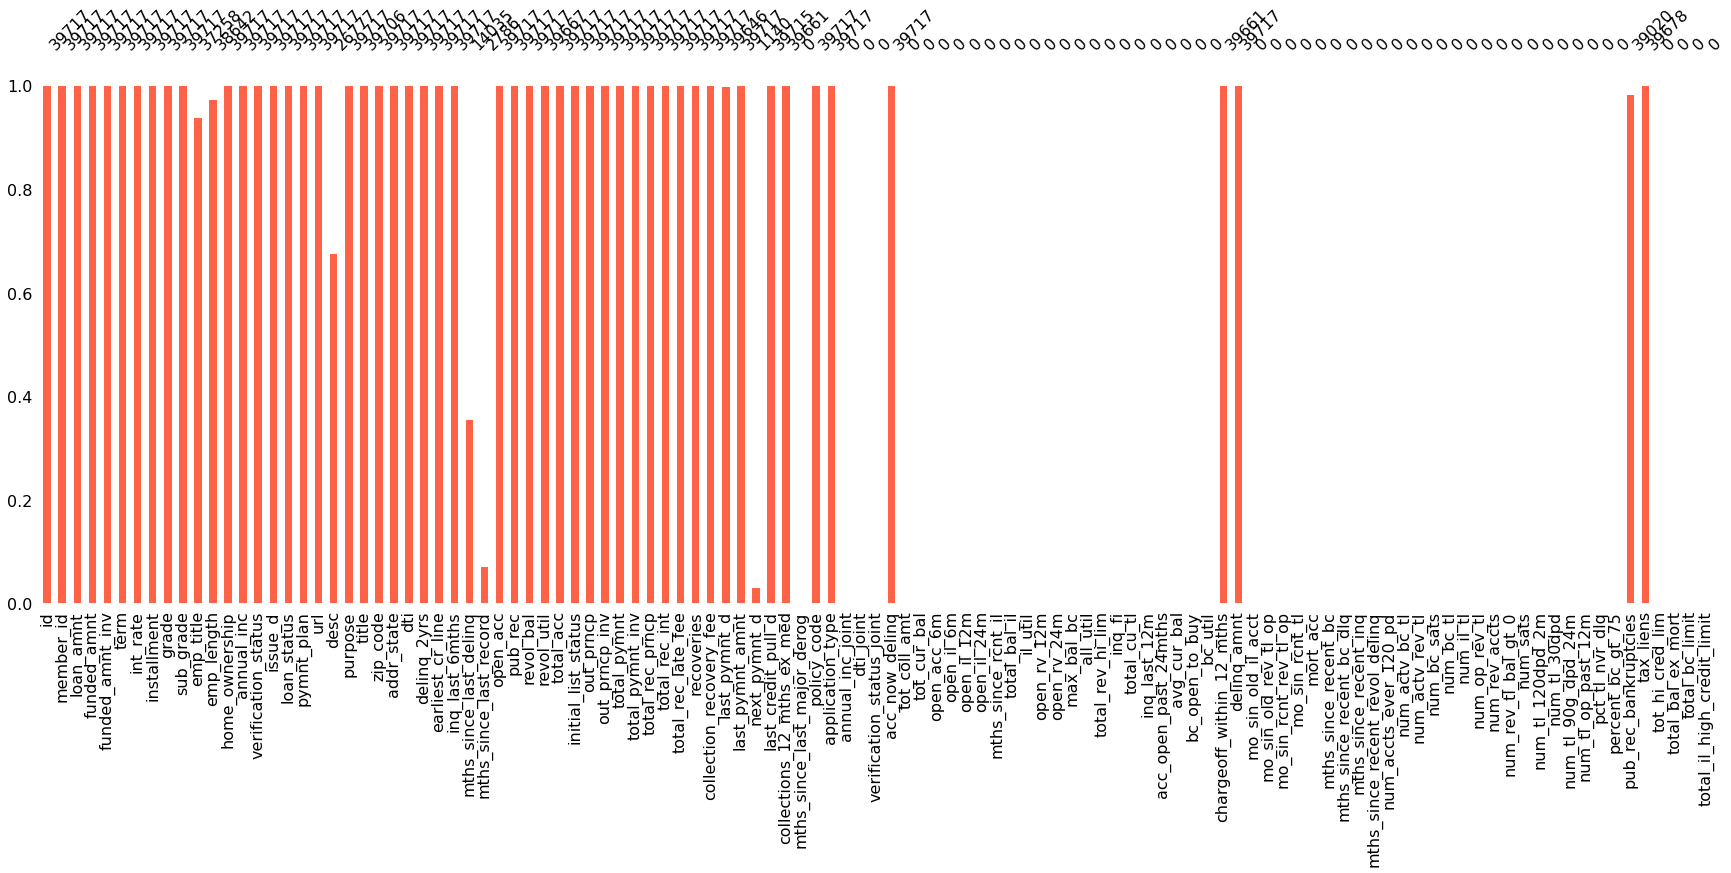

In [99]:
msno.bar(loan_data,figsize=(30,10),fontsize=16,color="tomato")

In [100]:
#Calculating the percentage of null values in each column
(loan_data.isna().sum()/len(loan_data.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [101]:
#It is observed that there are a lot of columns with all null values. Let's first remove them
#Observation:From 111 cloumns we dropped to 57 columns
loan_data.dropna(axis=1,inplace=True, how='all')
print(loan_data.shape)
display(loan_data.head())

(39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [102]:
#Once agian checking the column containing null values to cross verify
loan_data.isnull().sum().sort_values(ascending=False)
#Observation:We still see columns containing some null values. We need to examinine these columns

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [103]:
#Let us see if there are any columns with unique or single values in them.
column_unique = loan_data.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [104]:
#Lets drop the cloumns with single values  as they will be of no use for our analysis
c1 = column_unique[column_unique.values == 1]
print(c1.index)
#drop above columns with values "1"
loan_data.drop(columns = list(c1.index), inplace=True)
loan_data.shape

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


(39717, 48)

In [105]:
loan_data.isnull().sum().sort_values(ascending=False)

next_pymnt_d               38577
mths_since_last_record     36931
mths_since_last_delinq     25682
desc                       12940
emp_title                   2459
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
recoveries                     0
total_acc                      0
open_acc                       0
pub_rec                        0
revol_bal                      0
last_pymnt_amnt                0
out_prncp                      0
total_rec_late_fee             0
out_prncp_inv                  0
total_pymnt                    0
inq_last_6mths                 0
total_rec_prncp                0
collection_recovery_fee        0
total_rec_int                  0
total_pymnt_inv                0
id                             0
earliest_cr_line               0
home_ownership                 0
loan_amnt                      0
funded_amn

# Now we have 48 columns.We need to analyse them to identify the columns that will be helpful for analysis and remove the unwanted columns


In [106]:
#columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
#doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
#"desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
#"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis.
#So removing them.
#"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" ,
#we can remove the earlier column.
#delinq_2yrs
#revol_bal
#out_prncp
#total_pymnt
#total_rec_prncp
#total_rec_int
#total_rec_late_fee
#recoveries
#collection_recovery_fee
#last_pymnt_d
#last_pymnt_amnt
#next_pymnt_d
#chargeoff_within_12_mths
#mths_since_last_delinq
#mths_since_last_record
#These are post approval features, Hence removing them as well

In [107]:
del_cols = ["id","member_id","url","title","emp_title","zip_code","addr_state","desc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","funded_amnt","delinq_2yrs","mths_since_last_record",
            "next_pymnt_d","pub_rec_bankruptcies","mths_since_last_delinq","revol_bal"]
loan_data.drop(columns=del_cols, inplace=True)
loan_data.shape

(39717, 21)

In [108]:
loan_data.columns


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

# data cleaning 

In [109]:
#Checking column loan status
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [110]:
#Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, 
#so dropping this data makes sense
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data.shape

(38577, 21)

In [111]:
#take term and see how it can infulence our decision manking
loan_data['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [112]:
#Lets analyse the column int_rate
loan_data['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [113]:
#Let's remvoe %
loan_data['int_rate']=loan_data['int_rate'].apply(lambda x:x.replace("%",""))
loan_data['int_rate']=loan_data['int_rate'].astype(float)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [114]:
loan_data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:>

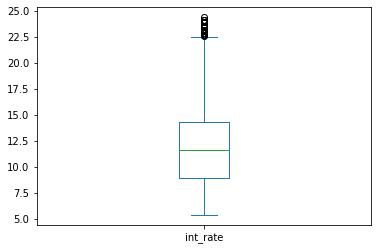

In [115]:
#Plotting boxplot to detect any outliers in int_rate
loan_data['int_rate'].plot.box()

In [116]:
#Analysing issued_date column
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [117]:
#Derived columns
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['year']=loan_data['issue_d'].dt.year
loan_data['month']=loan_data['issue_d'].dt.month
loan_data.drop(columns=['issue_d'], inplace=True)

In [118]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.70%,9,2011,12
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.40%,4,2011,12
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.50%,10,2011,12
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21%,37,2011,12
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.30%,12,2011,12


In [119]:
#Lets format employment length column to have only numbers. 
loan_data['emp_length'].fillna('0',inplace=True)#replace Nan values with 0
loan_data['emp_length']=loan_data['emp_length'].str.extract('(\d+)')# Regular Expression pattern \d is a regex pattern for digit 
#+ is a regex pattern for at least (one or more) since they are enclosed in a ( ) that means the group that you want to capture

In [120]:
#convert amount columns into numeric data to find some correlation among important ones.
cols1 = ['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
loan_data[cols1] = loan_data[cols1].apply(pd.to_numeric)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  int64  
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  dti                  38577 non-null  float64
 14  earliest_cr_line     38577 non-null  object 
 15  inq_last_6mths       38577 non-null 

# Univariate Analysis

# loan amount

In [125]:
loan_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

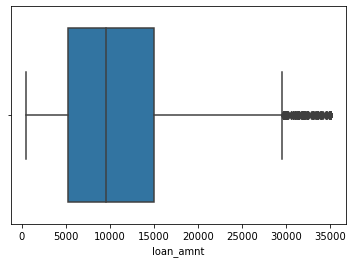

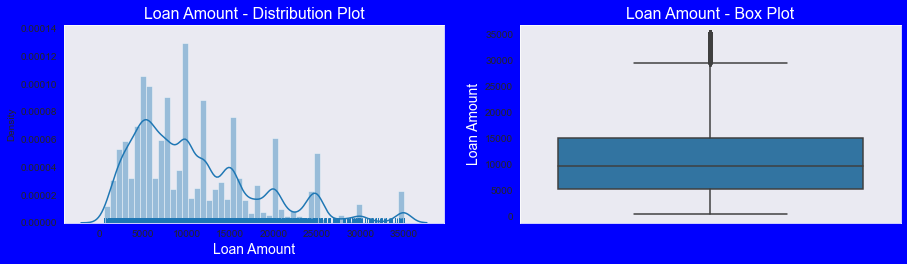

In [129]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

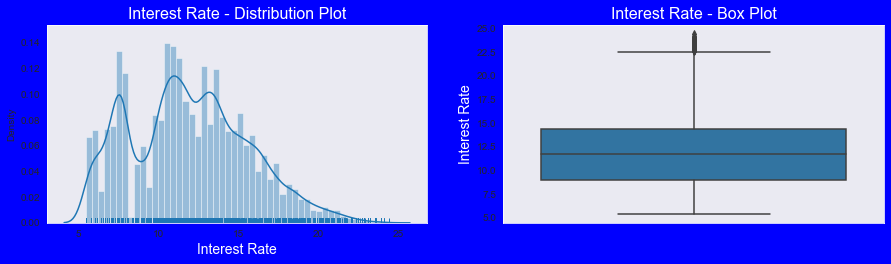

In [130]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

In [134]:
print(loan_data['annual_inc'].describe())
loan_data['annual_inc'].head()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

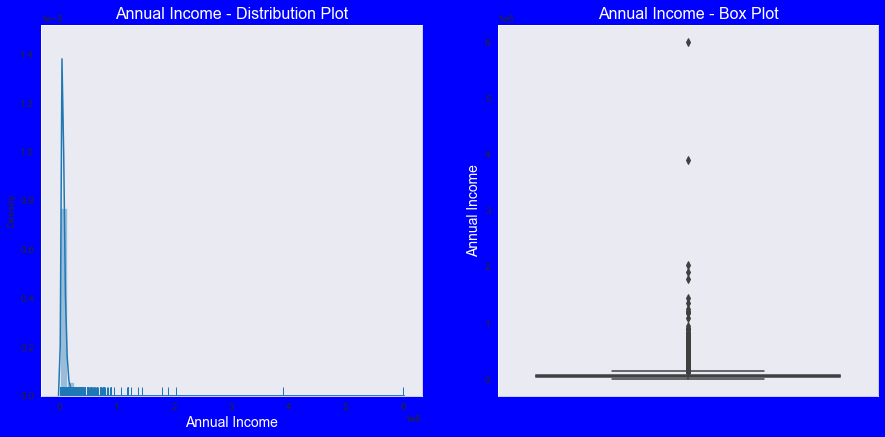

In [135]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,15),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_data['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
#Clearly indincating the presence of outliers.
#So, Removing them.


In [136]:

#Let's see the quantile info and take an appropriate action.
#The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.95
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [137]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

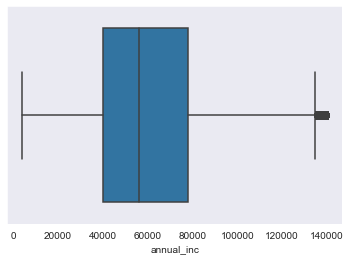

In [138]:
sns.boxplot(loan_data.annual_inc)
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

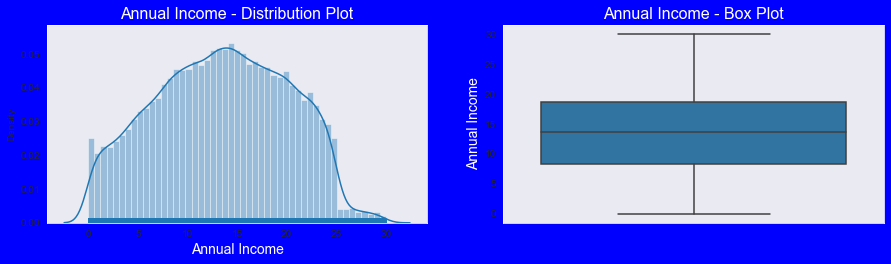

In [140]:
## Univariate Analysis on dti - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['dti'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_data['dti'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

#observation:No outliers found

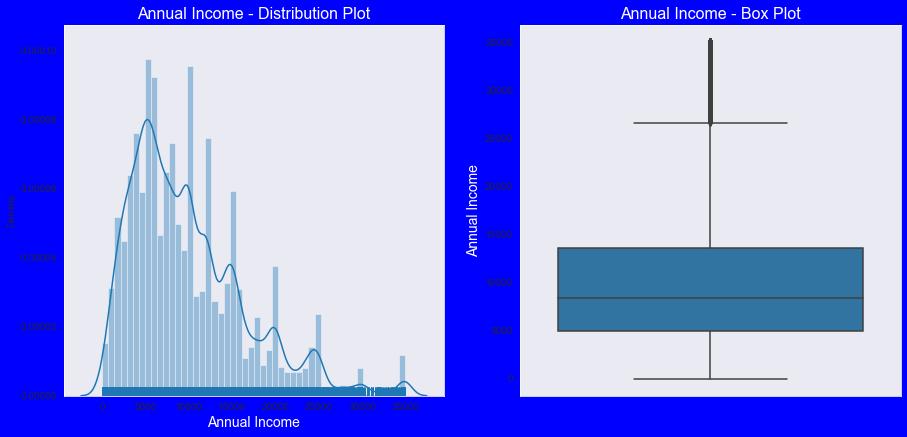

In [142]:
# Univariate Analysis on funded_amt_inv - Quantitative Variables

plt.figure(figsize=(15,15),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['funded_amnt_inv'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_data['funded_amnt_inv'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

#Observation:Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these 
#above columns.

TypeError: '<=' not supported between instances of 'str' and 'float'

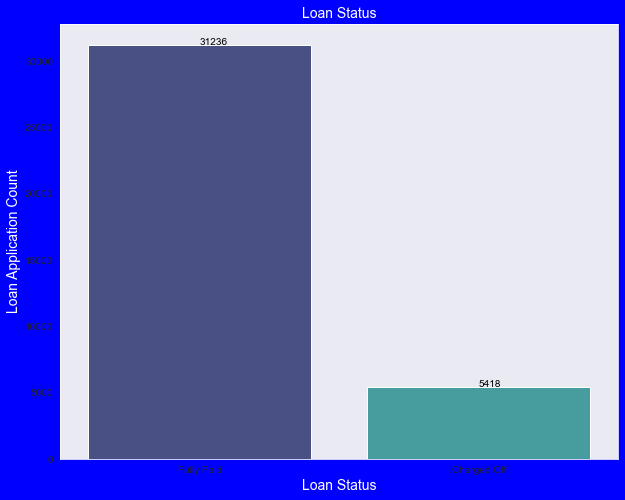

In [144]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan_data,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan_data['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

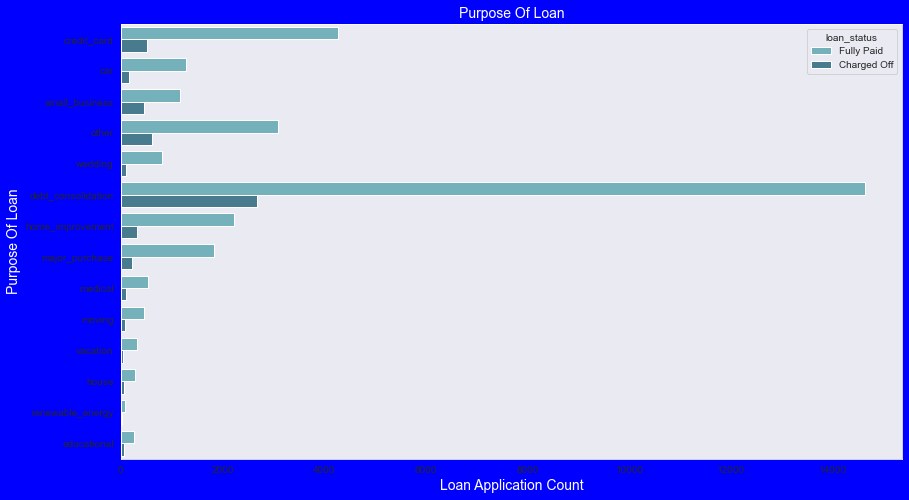

In [145]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

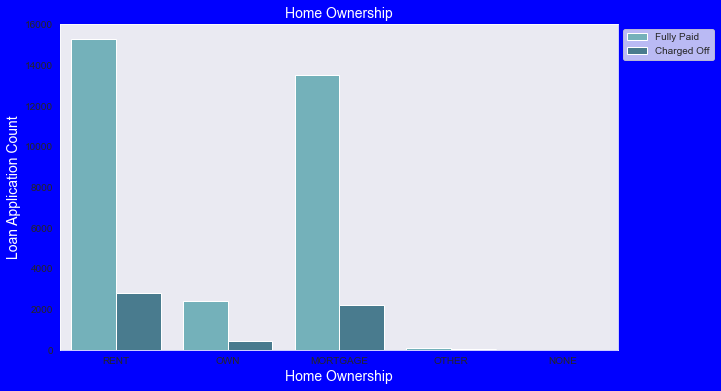

In [146]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

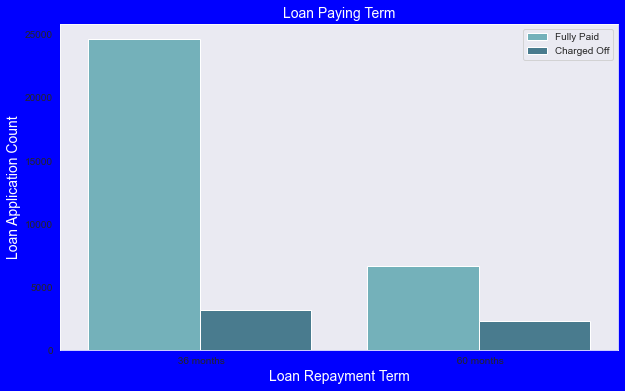

In [149]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

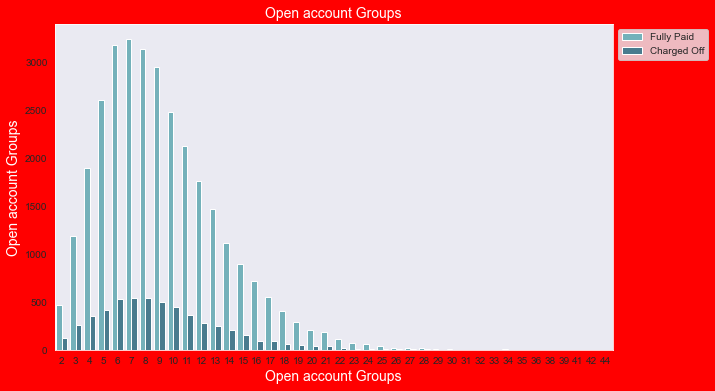

In [152]:
# Univariate Analysis - Ordered Categorical Variables- open account

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="open_acc",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Open account Groups',fontsize=14,color='w')
ax.set_xlabel('Open account Groups',fontsize=14,color = 'w')
ax.set_ylabel('Open account Groups',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


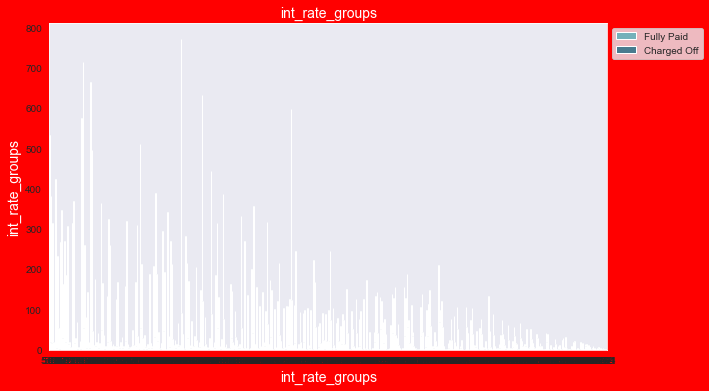

In [162]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

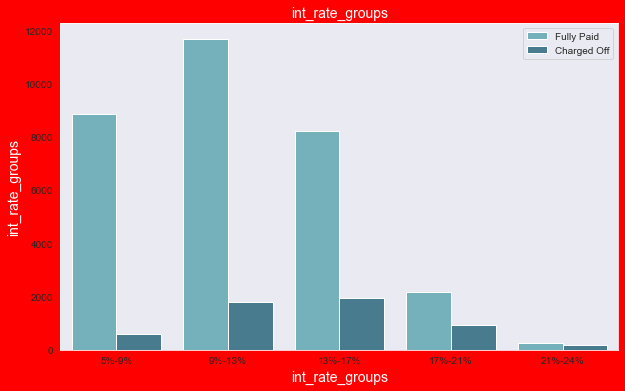

In [163]:
# Univariate Analysis -categorical data-Interest rate groups

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="int_rate_groups",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('int_rate_groups',fontsize=14,color='w')
ax.set_xlabel('int_rate_groups',fontsize=14,color = 'w')
ax.set_ylabel('int_rate_groups',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


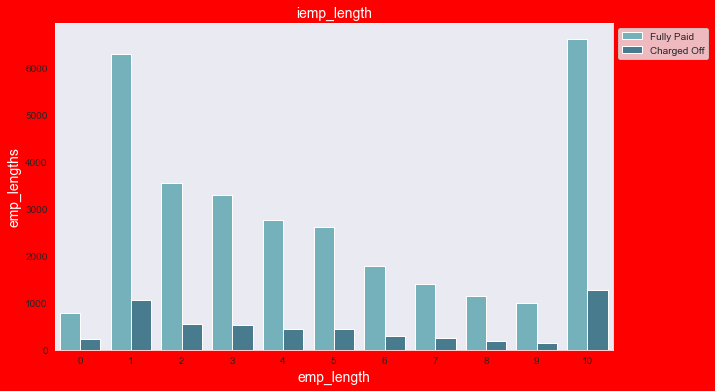

In [164]:
# Univariate Analysis - Quantitative data-emp length

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="emp_length",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('iemp_length',fontsize=14,color='w')
ax.set_xlabel('emp_length',fontsize=14,color = 'w')
ax.set_ylabel('emp_lengths',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


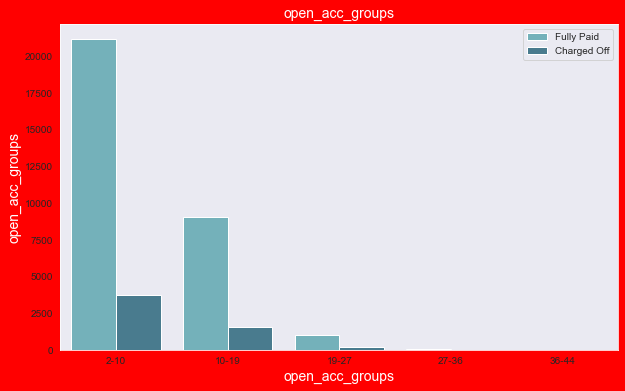

In [165]:
# Univariate Analysis - Quantitative data-open_acc_groups

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="open_acc_groups",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('open_acc_groups',fontsize=14,color='w')
ax.set_xlabel('open_acc_groups',fontsize=14,color = 'w')
ax.set_ylabel('open_acc_groups',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

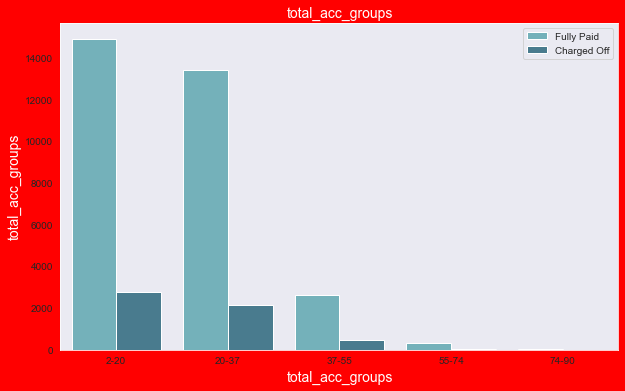

In [166]:
# Univariate Analysis - Quantitative data-total_acc_groups

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="total_acc_groups",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('total_acc_groups',fontsize=14,color='w')
ax.set_xlabel('total_acc_groups',fontsize=14,color = 'w')
ax.set_ylabel('total_acc_groups',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

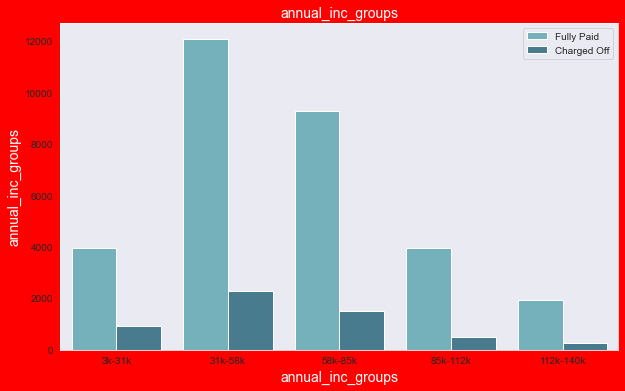

In [167]:
# Univariate Analysis - Quantitative data-annual_inc_groups

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="annual_inc_groups",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('annual_inc_groups',fontsize=14,color='w')
ax.set_xlabel('annual_inc_groups',fontsize=14,color = 'w')
ax.set_ylabel('annual_inc_groups',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

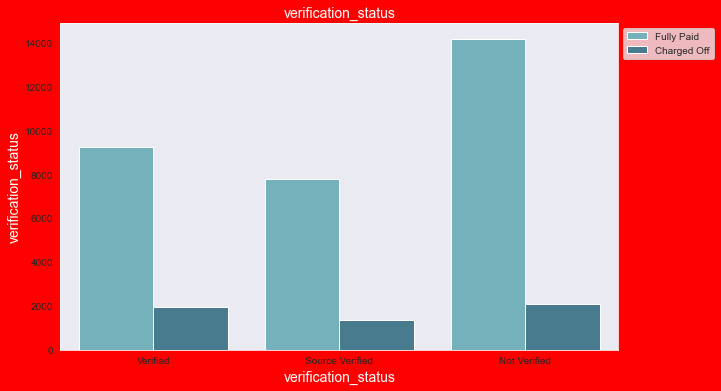

In [168]:
# Univariate Analysis - Quantitative data-verification status

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="verification_status",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('verification_status',fontsize=14,color='w')
ax.set_xlabel('verification_status',fontsize=14,color = 'w')
ax.set_ylabel('verification_status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

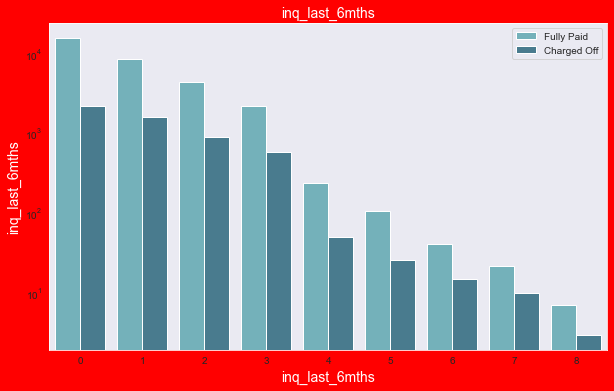

In [169]:
# Univariate Analysis - Quantitative data-inq_last_6mths

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="inq_last_6mths",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('inq_last_6mths',fontsize=14,color='w')
ax.set_xlabel('inq_last_6mths',fontsize=14,color = 'w')
ax.set_ylabel('inq_last_6mths',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
ax.set_yscale('log')
plt.show()

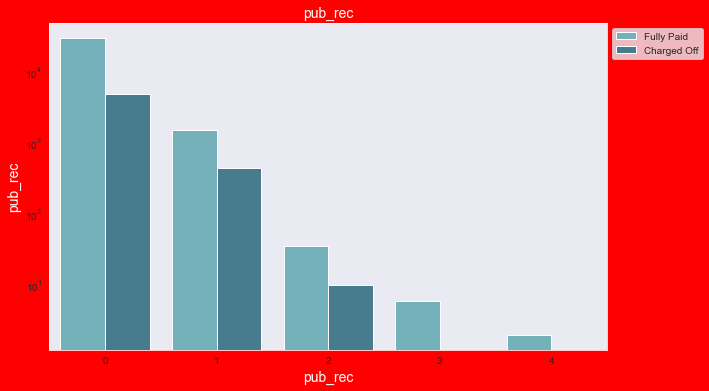

In [170]:
# Univariate Analysis - Quantitative data-pub_rec

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.countplot(x="pub_rec",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('pub_rec',fontsize=14,color='w')
ax.set_xlabel('pub_rec',fontsize=14,color = 'w')
ax.set_ylabel('pub_rec',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
ax.set_yscale('log')
plt.show()

In [ ]:
#Analyzing installment,dti, loan_amnt